In [276]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [277]:
col_names = ['Counting_Trust', 'Counting_Un-Trust', 'Last_Time', 'Transactions_Context','Trust_Score']
data = pd.read_csv("dishonest-internet-users.csv", header=None, names=col_names)

In [278]:
data.head()

,Counting_Trust,Counting_Un-Trust,Last_Time,Transactions_Context,Trust_Score
0,CT_range_1,CU_range_4,LT_range_4,sport,trustworthy
1,CT_range_2,CU_range_1,LT_range_4,sport,trustworthy
2,CT_range_3,CU_range_1,LT_range_4,sport,trustworthy
3,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy
4,CT_range_1,CU_range_4,LT_range_4,sport,trustworthy


In [279]:
def region_to_numeric(a):
    if a == 'untrustworthy':
        return 0
    if a == 'trustworthy':
        return 1

def ct_to_numeric(a):
    if a == 'CT_range_1':
        return 1
    if a == 'CT_range_2':
        return 2
    if a == 'CT_range_3':
        return 3
    if a == 'CT_range_4':
        return 4

def cu_to_numeric(a):
    if a == 'CU_range_1':
        return 1
    if a == 'CU_range_2':
        return 2
    if a == 'CU_range_3':
        return 3
    if a == 'CU_range_4':
        return 4
    if a == 'CU_range_5':
        return 5

def lt_to_numeric(a):
    if a == 'LT_range_1':
        return 1
    if a == 'LT_range_2':
        return 2
    if a == 'LT_range_3':
        return 3
    if a == 'LT_range_4':
        return 4

def tc_to_numeric(a):
    if a == 'ECommerce':
        return 1
    if a == 'game':
        return 2
    if a == 'holiday':
        return 3
    if a == 'sport':
        return 4

In [280]:
data['Counting_Trust'] = data['Counting_Trust'].apply(ct_to_numeric)
data['Counting_Un-Trust'] = data['Counting_Un-Trust'].apply(cu_to_numeric)
data['Last_Time'] = data['Last_Time'].apply(lt_to_numeric)
data['Transactions_Context'] = data['Transactions_Context'].apply(tc_to_numeric)
data['Trust_Score'] = data['Trust_Score'].apply(region_to_numeric)

In [281]:
data.head(10)

,Counting_Trust,Counting_Un-Trust,Last_Time,Transactions_Context,Trust_Score
0,1,4,4,4,1
1,2,1,4,4,1
2,3,1,4,4,1
3,4,1,4,4,0
4,1,4,4,4,1
5,2,1,4,4,1
6,3,1,4,4,1
7,4,1,4,4,0
8,1,4,4,4,1
9,1,4,4,4,1


In [282]:
feature_cols = ['Counting_Trust', 'Counting_Un-Trust', 'Last_Time', 'Transactions_Context']
data_X = data[feature_cols]


In [283]:
data_y = data['Trust_Score']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1)

In [285]:
clf = DecisionTreeClassifier(criterion="entropy")

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [286]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


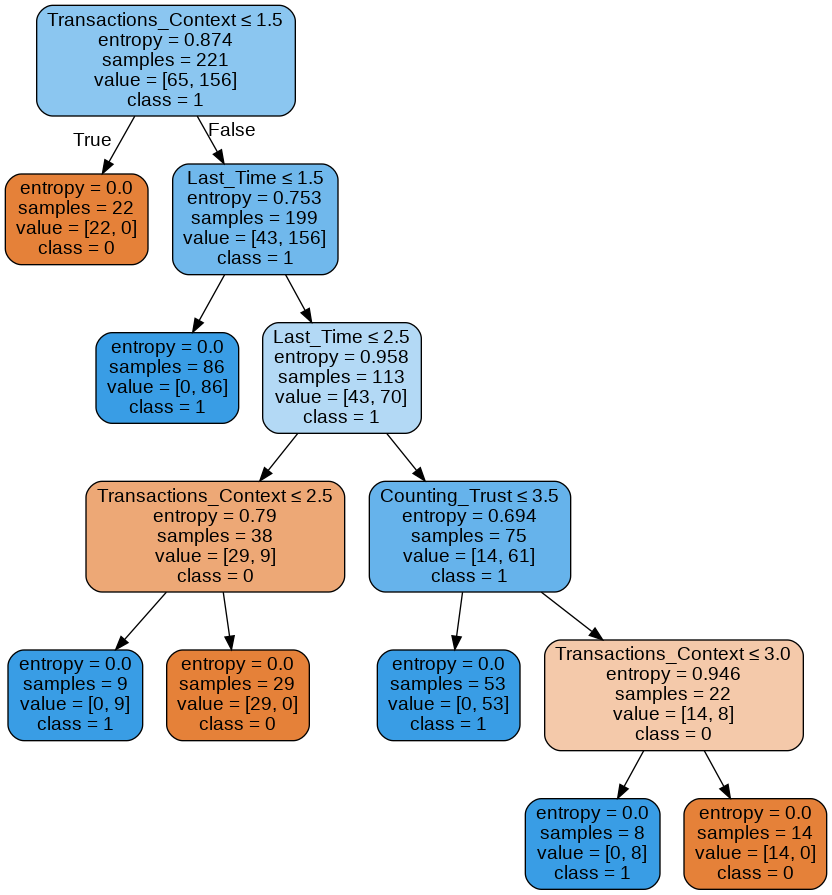

In [287]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dishonest-internet-users.png')
Image(graph.create_png())